<a href="https://colab.research.google.com/github/ParthikB/Vohoo-Tensorflow/blob/master/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [6]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')            # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')            # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [12]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('Total training cat images    :', num_cats_tr)
print('Total training dog images    :', num_dogs_tr)

print('Total validation cat images  :', num_cats_val)
print('Total validation dog images  :', num_dogs_val)
print("----------------------------------------------")
print("Total training images        :", total_train)
print("Total validation images      :", total_val)

Total training cat images    : 1000
Total training dog images    : 1000
Total validation cat images  : 500
Total validation dog images  : 500
----------------------------------------------
Total training images        : 2000
Total validation images      : 1000


### **Setting Up model parameters**

In [0]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

### Data Pre-processing

In [0]:
train_img_generator       = ImageDataGenerator(rescale=1./255)
validation_img_generator  = ImageDataGenerator(rescale=1./255)

In [15]:
train_data = train_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE),
                                                     class_mode='binary')

val_data   = validation_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=validation_dir,
                                                          shuffle=False,
                                                          target_size=(IMG_SHAPE, IMG_SHAPE),
                                                          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


###Visualizing Training Images

In [0]:
sample_training_images, _ = next(train_data)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

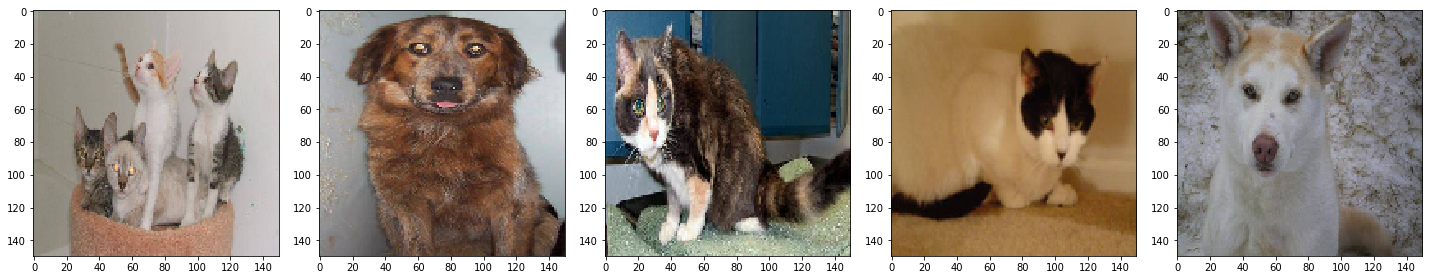

In [21]:
plotImages(sample_training_images[:5])

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [30]:
model.fit(train_data, epochs=10)

Epoch 1/10
20/20 [==============================] - 8s 392ms/step - loss: 0.7131 - acc: 0.5170
Epoch 2/10
20/20 [==============================] - 7s 342ms/step - loss: 0.6884 - acc: 0.5350
Epoch 3/10
20/20 [==============================] - 7s 342ms/step - loss: 0.6665 - acc: 0.6085
Epoch 4/10
20/20 [==============================] - 7s 343ms/step - loss: 0.6264 - acc: 0.6445
Epoch 5/10
20/20 [==============================] - 7s 343ms/step - loss: 0.5987 - acc: 0.6880
Epoch 6/10
20/20 [==============================] - 7s 341ms/step - loss: 0.5492 - acc: 0.7175
Epoch 7/10
20/20 [==============================] - 7s 340ms/step - loss: 0.5371 - acc: 0.7260
Epoch 8/10
20/20 [==============================] - 7s 341ms/step - loss: 0.4863 - acc: 0.7625
Epoch 9/10
20/20 [==============================] - 7s 340ms/step - loss: 0.4628 - acc: 0.7765
Epoch 10/10
20/20 [==============================] - 7s 342ms/step - loss: 0.4458 - acc: 0.7875


In [35]:
EPOCHS = 100

history = model.fit_generator(
                    train_data,
                    steps_per_epoch=int(np.ceil(total_train/BATCH_SIZE)),
                    epochs=EPOCHS,
                    validation_data = val_data,
                    validation_steps = int(np.ceil(total_val/BATCH_SIZE))
                              )

Epoch 1/100
20/20 [==============================] - 12s 602ms/step - loss: 0.6931 - acc: 0.5380 - val_loss: 0.6888 - val_acc: 0.5620
Epoch 2/100
20/20 [==============================] - 9s 446ms/step - loss: 0.6874 - acc: 0.5490 - val_loss: 0.6809 - val_acc: 0.5970
Epoch 3/100
20/20 [==============================] - 9s 452ms/step - loss: 0.6720 - acc: 0.5895 - val_loss: 0.6856 - val_acc: 0.5720
Epoch 4/100
20/20 [==============================] - 9s 447ms/step - loss: 0.6575 - acc: 0.6125 - val_loss: 0.6802 - val_acc: 0.5780
Epoch 5/100
20/20 [==============================] - 9s 449ms/step - loss: 0.6208 - acc: 0.6475 - val_loss: 0.6337 - val_acc: 0.6440
Epoch 6/100
20/20 [==============================] - 9s 444ms/step - loss: 0.5732 - acc: 0.7005 - val_loss: 0.6055 - val_acc: 0.6880
Epoch 7/100
20/20 [==============================] - 9s 447ms/step - loss: 0.5329 - acc: 0.7340 - val_loss: 0.5905 - val_acc: 0.7020
Epoch 8/100
20/20 [==============================] - 9s 449ms/step -